# <span style="color:brown">KAVAK CASE</span>

### <span style="color:brown">Boosting</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import math
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor


In [2]:
data = pd.read_csv('carvakCase.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_41535/1453708669.py:1: UserWarning: Parsing '31.12.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_41535/1453708669.py:1: UserWarning: Parsing '13.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_41535/1453708669.py:1: UserWarning: Parsing '14.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_41535/1453708669.py:1: UserWarning: Parsing '15.01.2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  

In [4]:
data["Open"] = data["Open"].str.replace("[a-zA-Z]", "", regex = True)

In [5]:
data['Open'] = data['Open'].astype('float')

In [6]:
#Outlier
for column in data.columns:
    low_limit = data[column].quantile(0.25)
    high_limit = data[column].quantile(0.75)
    iqr = high_limit - low_limit
    lower_bound = low_limit - 1.5 * iqr
    upper_bound = high_limit + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data = data.drop(outliers.index)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,184.070007,184.690002,183.929993,184.690002,162.482605,86119900
1,2014-02-01,183.979996,184.070007,182.479996,182.919998,160.925400,119636900
2,2014-03-01,NaN,183.600006,182.630005,182.889999,160.898972,81390600
3,2014-06-01,183.490005,183.559998,182.080002,182.360001,160.432693,108028200
4,2014-07-01,183.089996,183.789993,182.949997,183.479996,161.418060,86144200


In [8]:
data['HL_PCT'] = (data['High'] - data['Low']) / data['Low'] * 100.0  # high-low percentage
data['PCT_change'] = (data['Close'] - data['Open']) / data['Open'] * 100.0  # open-close percentage

In [9]:
#df = data[['Date', 'Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]

In [9]:
data.isnull().sum()

Date           0
Open          11
High           0
Low            1
Close         23
Adj Close      1
Volume         0
HL_PCT         1
PCT_change    34
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low', 'Adj Close', 'HL_PCT', 'PCT_change']

for column in cols:
   data[column].fillna(data[column].mean(), inplace=True)

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_change
0,2013-12-31,184.070007,184.690002,183.929993,184.690002,162.482605,86119900,0.413206,0.336826
1,2014-02-01,183.979996,184.070007,182.479996,182.919998,160.925400,119636900,0.871335,-0.576148
3,2014-06-01,183.490005,183.559998,182.080002,182.360001,160.432693,108028200,0.812827,-0.615840
4,2014-07-01,183.089996,183.789993,182.949997,183.479996,161.418060,86144200,0.459140,0.213010
5,2014-08-01,183.449997,183.830002,182.889999,183.520004,161.453278,96582300,0.513971,0.038162


In [13]:
df = data[['Date', 'Adj Close', 'HL_PCT', 'PCT_change', 'Volume']] 

In [15]:
#data.set_index('Date', inplace=True)

In [16]:
#forecast_out = 10

In [14]:

forecast_out = int(math.ceil(0.10 * len(data)))
data['label'] = data['Adj Close'].shift(-forecast_out)


In [15]:
scaler = StandardScaler()

In [16]:
X = np.array(data.drop(['label', 'Date'], 1))
scaler.fit(X)


/var/folders/4l/4s0j85s169n_y5f0vmfx0qc40000gn/T/ipykernel_41535/3497904695.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['label', 'Date'], 1))


StandardScaler()

In [17]:
X = scaler.transform(X)


In [18]:
X_Predictions = X[-forecast_out:]  #  predicted
X = X[:-forecast_out]  # trained


In [19]:
data.dropna(inplace=True)
y = np.array(data['label']) # or target

In [20]:
# Train ve Test setleri oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [22]:
# AdaBoost Regressor
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
adb_y_pred = adb.predict(X_test)

In [23]:
# LightGBM Regressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_y_pred = lgbm.predict(X_test)

In [33]:
print(lgbm_y_pred)

[241.36931765 194.45123417 188.94676685 197.45241028 181.19863435
 182.89282402 259.09208172 258.11130505 224.71298763 203.6255742
 224.22547568 222.93494479 261.95679614 177.51373478 195.05627809
 281.85021819 177.58016819 296.95177198 194.06740653 246.31512694
 297.26234448 251.02881176 239.5324883  186.86882906 187.36338686
 264.05383208 179.20568378 178.65708787 282.5253336  182.71569299
 262.74246547 222.95594577 234.63057402 191.5567978  194.10521862
 217.14071977 191.97850054 194.45372231 190.01735446 196.84971692
 205.41792926 280.68834848 191.46251443 177.85571208 187.75293479
 190.6517849  292.00805027 181.34576124 177.48134773 229.63465915
 222.94618505 194.17653308 304.75602712 200.90228567 200.27317684
 280.89659535 302.76180148 181.27810828 187.5956939  193.59166652
 232.54396662 252.80468374 214.46065081 278.08484647 223.31009435
 188.58210225 270.30004799 230.38156009 224.60430216 259.55992987
 208.25631555 241.30502632 292.96303164 313.2173786  187.67456942
 232.958734

In [24]:
# RMSE Hesaplama
xgb_rmse = np.sqrt(np.mean((y_test - xgb_y_pred)**2))
adb_rmse = np.sqrt(np.mean((y_test - adb_y_pred)**2))
lgbm_rmse = np.sqrt(np.mean((y_test - lgbm_y_pred)**2))



In [25]:
# RMSE liste
rmse_list = [xgb_rmse, adb_rmse, lgbm_rmse]

In [26]:
print(rmse_list)

[9.027192803436117, 11.428629688733654, 8.453310948019796]


Text(0.5, 1.0, 'Boosting Algorithms')

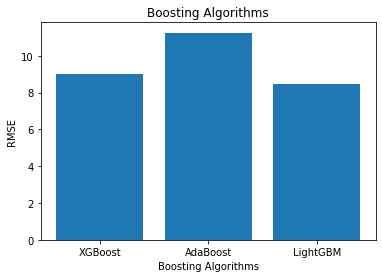

In [32]:
# RMSE 
plt.bar(['XGBoost', 'AdaBoost', 'LightGBM'], rmse_list)
plt.xlabel('Boosting Algorithms')
plt.ylabel('RMSE')
plt.title('Boosting Algorithms')